# Data Load

## Data Info

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# 1) CSV 로드 (경로는 실제 파일 위치로 변경)
df = pd.read_csv("../../data/raw/online_shoppers_intention.csv")

# 2) 크기 및 컬럼 확인
print("shape:", df.shape)
print("\ncolumns:\n", df.columns)

# 3) 데이터 타입 및 대략적인 정보
print("\ninfo:")
print(df.info())

# 4) 상위 5행 미리 보기
df.head()


shape: (12330, 18)

columns:
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates     

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


- 12,330행, 18개 컬럼
- 10개 수치형, 7개 범주형 피처 + 1개 타깃(**Revenue**)

## Column Info

In [4]:
target_col = "Revenue"

numeric_features = [
    "Administrative",  # 계정 관리 페이지 방문 횟수
    "Administrative_Duration",  # 계정 관리 페이지 체류 시간
    "Informational",  # 공지, 이용안내 등 정보성 페이지 방문 횟수
    "Informational_Duration",  # 공지, 이용안내 등 정보성 페이지 체류 시간
    "ProductRelated",  # 상품 목록, 상품 상세, 상품 카테고리 등 제품 관련 페이지 방문 횟수
    "ProductRelated_Duration",  # 상품 목록, 상품 상세, 상품 카테고리 등 제품 관련 페이지 체류 시간
    "BounceRates",  # 이탈률
    "ExitRates",  # 종료율
    "PageValues",  # 페이지 가치 점수
    "SpecialDay",  # 특정 기념일(발렌타인데이, 크리스마스 등) 근접도
]

categorical_features = [
    "Month",  # 방문 월
    "OperatingSystems",  # 운영체제 유형
    "Browser",  # 브라우져 유형
    "Region",  # 지역
    "TrafficType",  # 유입경로
    "VisitorType",  # 방문자 유형
    "Weekend",  # 주말여부
]

# 데이터 전처리

## 형변환

In [5]:
# 타깃을 0/1로 변환 (True/False → 1/0)
df[target_col] = df[target_col].astype(int)

# 범주형으로 사용할 int 컬럼들을 문자열로 변환
for col in ["OperatingSystems", "Browser", "Region", "TrafficType"]:
    df[col] = df[col].astype(str)

# Weekend도 범주형 텍스트로 변환(그래프 예쁘게 보기용)
df["Weekend"] = df["Weekend"].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [6]:
# 타깃을 0/1로 변환 (True/False → 1/0)
df[target_col] = df[target_col].astype(int)

# 범주형으로 사용할 int 컬럼들을 문자열로 변환
for col in ["OperatingSystems", "Browser", "Region", "TrafficType"]:
    df[col] = df[col].astype(str)

# Weekend도 범주형 텍스트로 변환(그래프 예쁘게 보기용)
df["Weekend"] = df["Weekend"].astype(str)


In [7]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "June",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df["Month"] = pd.Categorical(
    df["Month"],
    categories=month_order,
    ordered=True
)

## 결측치 확인

In [8]:
# 각 컬럼별 결측 개수
na_counts = df.isna().sum().sort_values(ascending=False)
print(na_counts)

# 결측 비율까지 같이 보고 싶다면
na_ratio = (df.isna().mean() * 100).sort_values(ascending=False)
print("\n결측 비율(%):\n", na_ratio)


Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Revenue                    0
dtype: int64

결측 비율(%):
 Administrative             0.0
Administrative_Duration    0.0
Weekend                    0.0
VisitorType                0.0
TrafficType                0.0
Region                     0.0
Browser                    0.0
OperatingSystems           0.0
Month                      0.0
SpecialDay                 0.0
PageValues                 0.0
ExitRates                  0.0
BounceRates                0.0
ProductRelated_Duration    0.0
ProductRelated     

- 결측치 없음

## 타겟 분포 확인

Revenue
0    10422
1     1908
Name: count, dtype: int64

비율:
Revenue
0    84.525547
1    15.474453
Name: proportion, dtype: float64


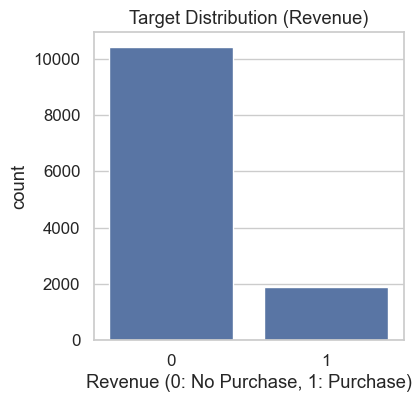

In [9]:
y = df[target_col]

print(y.value_counts())
print("\n비율:")
print(y.value_counts(normalize=True) * 100)

plt.figure(figsize=(4, 4))
sns.countplot(x=y)
plt.title("Target Distribution (Revenue)")
plt.xlabel("Revenue (0: No Purchase, 1: Purchase)")
plt.show()


- 불균형 데이터 확인
- 구매 비율이 약 15%

# EDA

## 수치형 변수 EDA

### histogram, 커널밀도

In [10]:
# 수치형 기본 통계
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


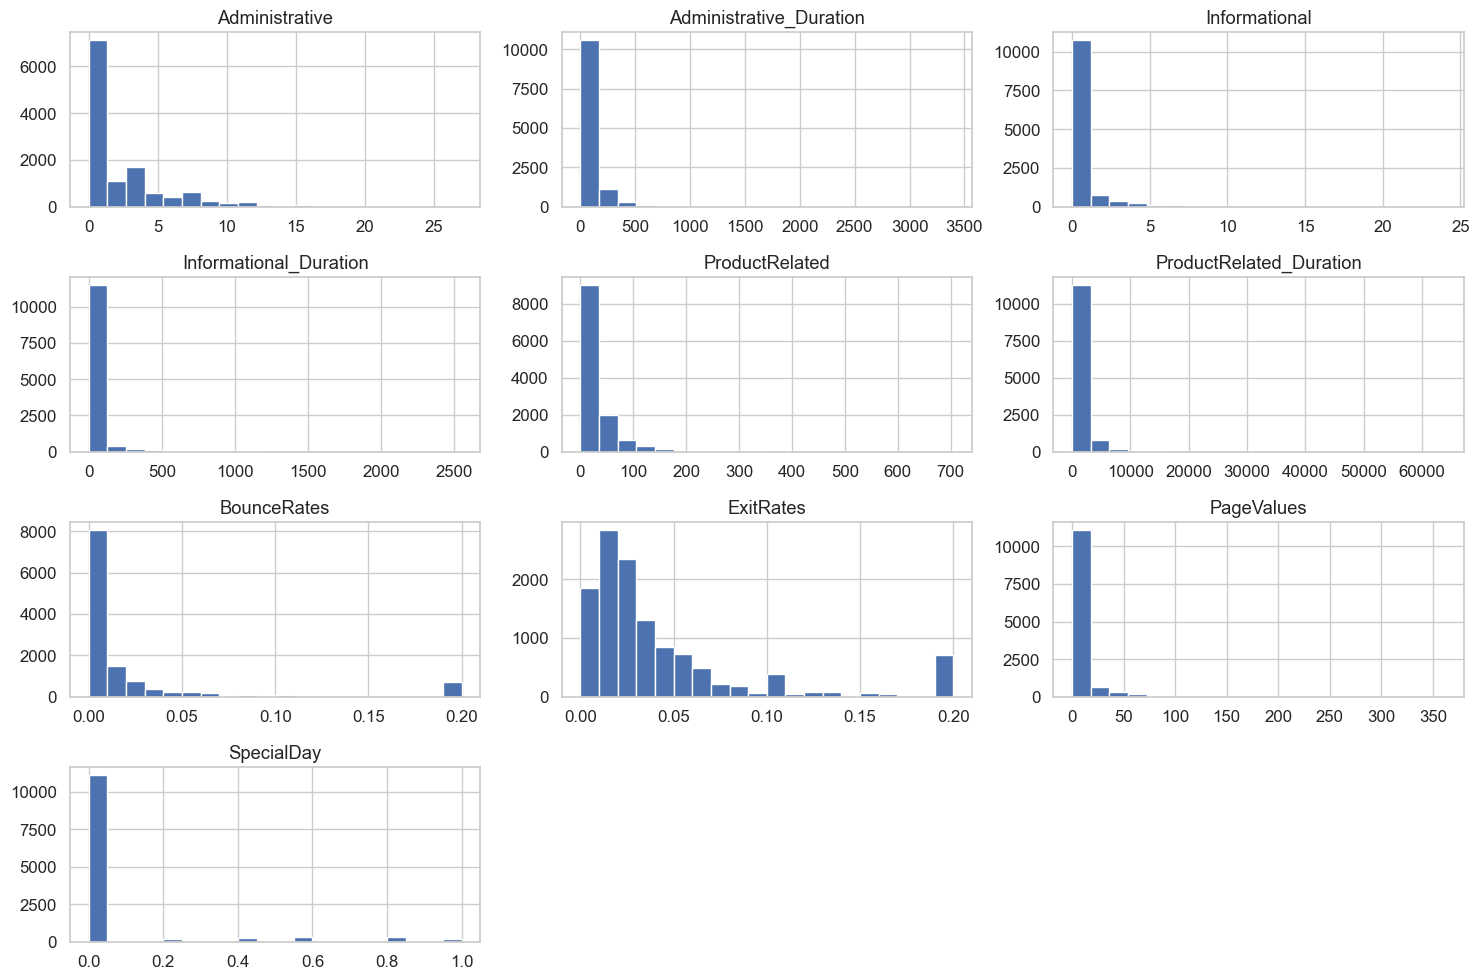

In [11]:
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 타겟별 수치형 분포 비교(구매 vs 비구매)

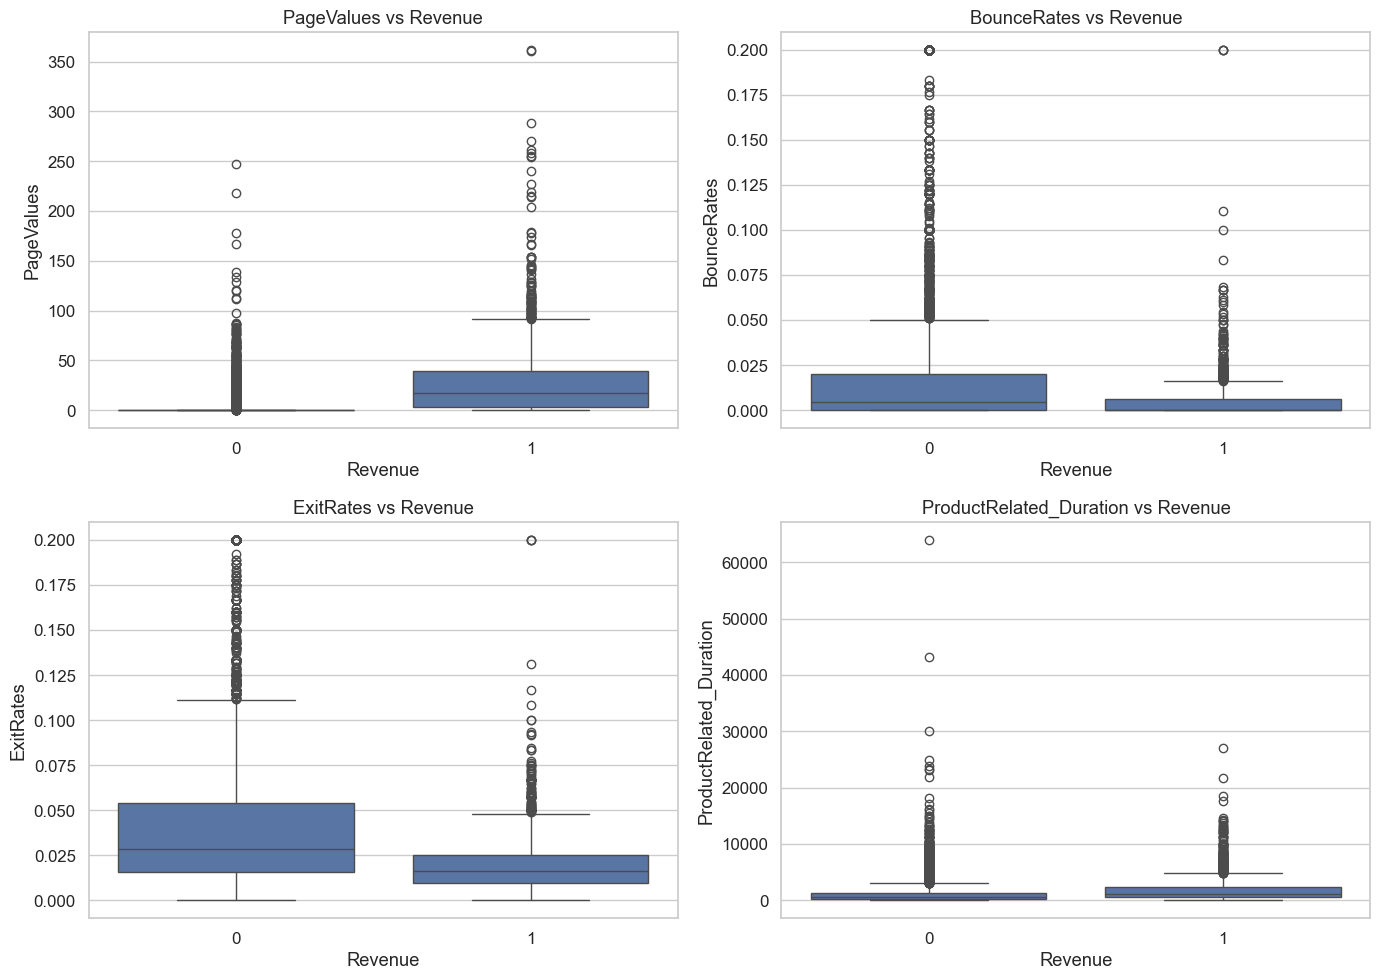

In [12]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(["PageValues", "BounceRates", "ExitRates", "ProductRelated_Duration"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs Revenue")

plt.tight_layout()
plt.show()


- PageValues
    - Revenue=1 그룹에서 평균/중앙값이 훨씬 높음
    - → 결제/장바구니 관련 행동이 활발할수록 실제 구매로 이어질 가능성 ↑

- BounceRates / ExitRates
    - Revenue=1 그룹에서 전반적으로 더 낮은 경향
    - → 빨리 나가거나 랜딩 페이지에서 바로 튕기는 사용자는 구매 확률 ↓

- ProductRelated_Duration
    - 어느 정도까지 증가할수록 구매 확률 ↑
    - 너무 과도하면 “고민만 오래 하고 결국 안 사는” 군도 있을 수 있음 (비선형성 체크 포인트)

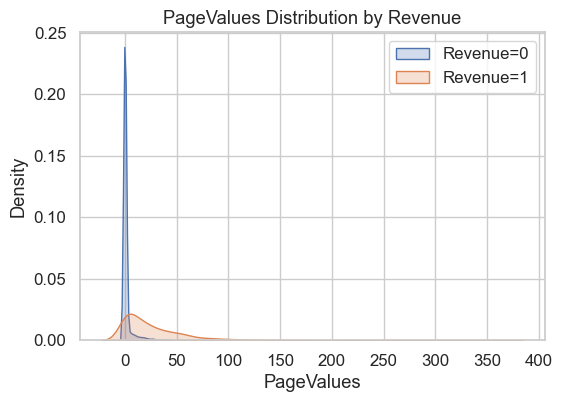

In [13]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df[target_col] == 0]["PageValues"], label="Revenue=0", fill=True)
sns.kdeplot(df[df[target_col] == 1]["PageValues"], label="Revenue=1", fill=True)
plt.title("PageValues Distribution by Revenue")
plt.legend()
plt.show()


## 범주형 변수 EDA

### 범주형 변수의 기본 분포

In [14]:
for col in categorical_features:
    print(f"\n==== {col} ====")
    print(df[col].value_counts())
    print("\n비율(%):")
    print(df[col].value_counts(normalize=True) * 100)



==== Month ====
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Jan        0
Apr        0
Name: count, dtype: int64

비율(%):
Month
May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Jan      0.000000
Apr      0.000000
Name: proportion, dtype: float64

==== OperatingSystems ====
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

비율(%):
OperatingSystems
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: proportion, dtype: float64

==== Browser ====
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

비율(%):

- 방문자 통계 월마다 다름
- 방문자 많아지는 월에 Informational 과 Revenue와의 상관관계를 보는것도 재밋을듯 함

### 월별 구매율

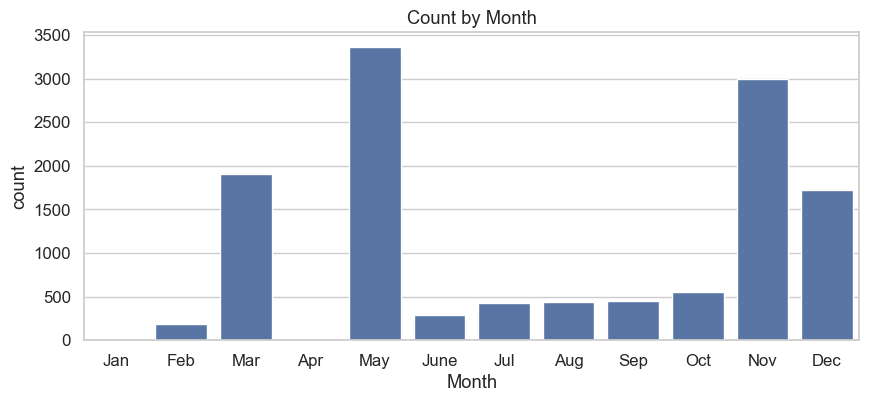

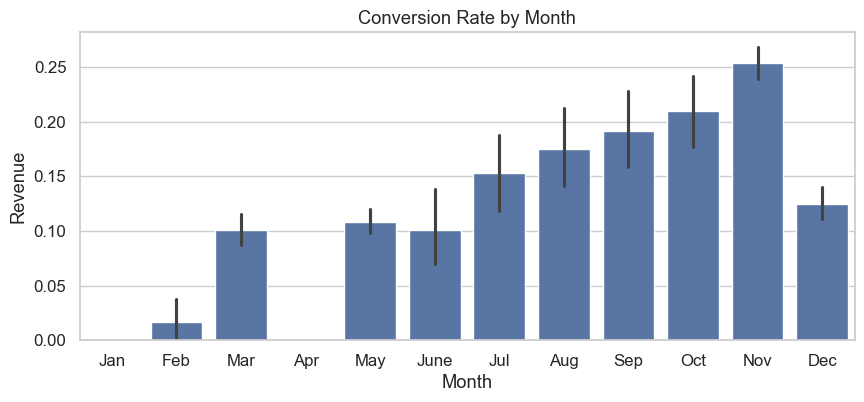

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(x="Month", data=df)
plt.title("Count by Month")
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x="Month", y=target_col, data=df)
plt.title("Conversion Rate by Month")
plt.show()

#### 월별 방문자 수 & Informational 사용 요약표

In [16]:
high_months = ["Mar", "May", "Nov", "Dec"]   # 네가 말한 트래픽 많은 달

monthly_stats = (
    df
    .groupby("Month", observed=True)
    .agg(
        sessions=("Revenue", "size"),                      # 해당 월 전체 세션 수
        info_mean=("Informational", "mean"),               # Informational 페이지 평균 개수
        info_median=("Informational", "median"),
        info_any_rate=("Informational", lambda x: (x > 0).mean()),  # Informational >=1 인 세션 비율
        info_dur_mean=("Informational_Duration", "mean")   # Informational 페이지 체류시간 평균
    )
    .sort_values("sessions", ascending=False)
)

print(monthly_stats)


       sessions  info_mean  info_median  info_any_rate  info_dur_mean
Month                                                                
May        3364   0.423900          0.0       0.195600      27.163159
Nov        2998   0.646431          0.0       0.259173      43.634938
Mar        1907   0.420556          0.0       0.179339      30.673764
Dec        1727   0.512449          0.0       0.199768      38.069358
Oct         549   0.488160          0.0       0.234973      38.666926
Sep         448   0.566964          0.0       0.227679      35.736835
Aug         433   0.542725          0.0       0.240185      35.514365
Jul         432   0.516204          0.0       0.233796      45.520409
June        288   0.562500          0.0       0.218750      20.450775
Feb         184   0.086957          0.0       0.054348       2.385870


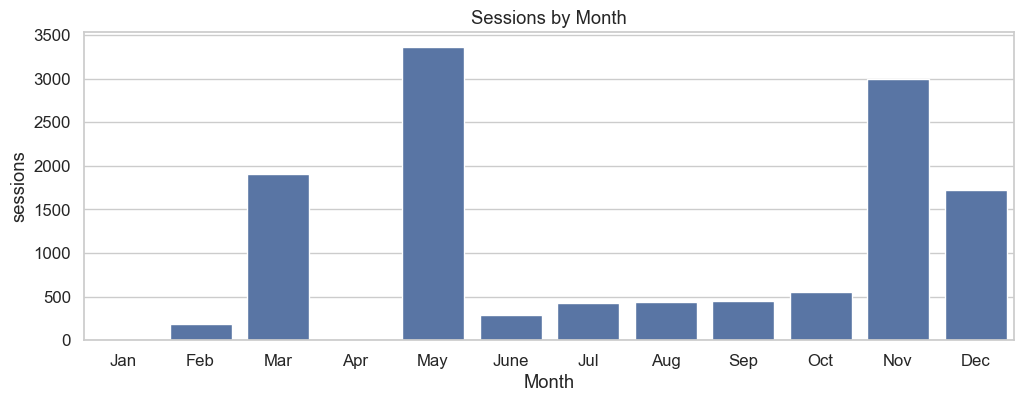

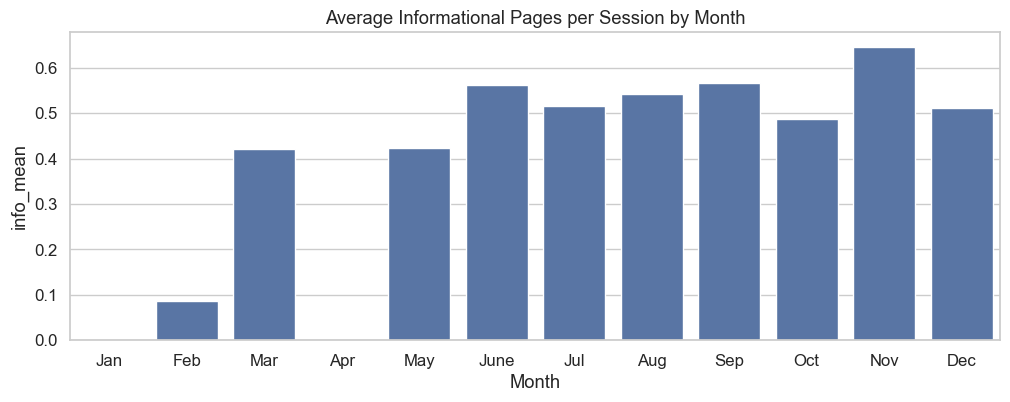

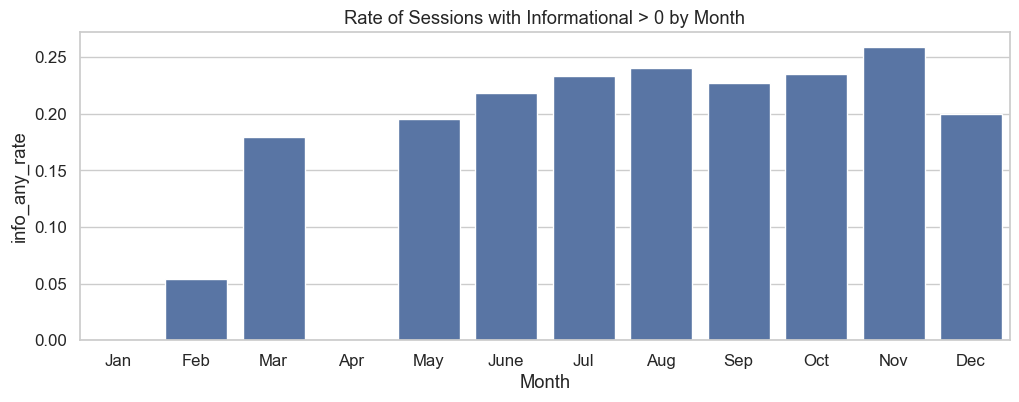

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(x=monthly_stats.index, y=monthly_stats["sessions"])
plt.title("Sessions by Month")
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x=monthly_stats.index, y=monthly_stats["info_mean"])
plt.title("Average Informational Pages per Session by Month")
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x=monthly_stats.index, y=monthly_stats["info_any_rate"])
plt.title("Rate of Sessions with Informational > 0 by Month")
plt.show()


- 크게 상관관계는 없어 보임..

#### 트래픽 많은 달 vs 나머지달 비교

In [18]:
high_months = ["Mar", "May", "Nov", "Dec"]

df["is_high_month"] = df["Month"].isin(high_months).astype(int)

df[["Month", "is_high_month"]].head()

,Month,is_high_month
0,Feb,0
1,Feb,0
2,Feb,0
3,Feb,0
4,Feb,0


In [19]:
group_stats = (
    df
    .groupby("is_high_month")
    .agg(
        sessions=("Revenue", "size"),
        info_mean=("Informational", "mean"),
        info_median=("Informational", "median"),
        info_any_rate=("Informational", lambda x: (x > 0).mean()),
        info_dur_mean=("Informational_Duration", "mean")
    )
)

print(group_stats)


               sessions  info_mean  info_median  info_any_rate  info_dur_mean
is_high_month                                                                
0                  2334   0.496144          0.0       0.218081      33.680207
1                  9996   0.505302          0.0       0.212285      34.657369


- info_mean
    - low(0): 0.4961
    - high(1): 0.5053
    → 차이: 0.0092
    → 평균이 0.5 정도니까, 대략 1.8% 정도 차이밖에 안 남

- info_any_rate (Informational > 0인 세션 비율)
    - low: 0.2181
    - high: 0.2123
    → 오히려 high_month 쪽이 0.5~0.6%p 낮음

- info_dur_mean (Informational_Duration 평균)
    - low: 33.68
    - high: 34.66
    → 차이: 약 0.98초 정도

“고트래픽 월(is_high_month=1)이라고 해서 Informational 페이지를 더 많이 보거나, 더 자주 들어가거나, 훨씬 오래 보는 건 아니다. 두 그룹의 행동 패턴은 거의 비슷하다.”

### 방문자별 구매율

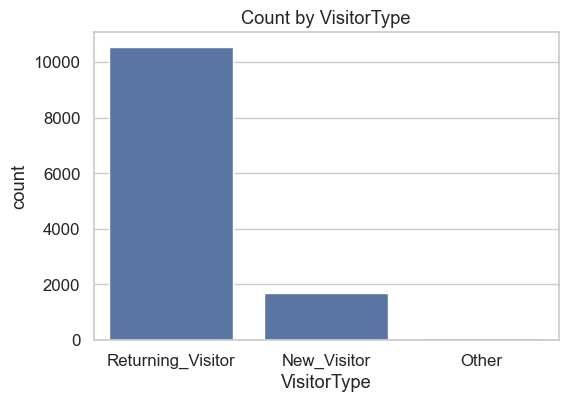

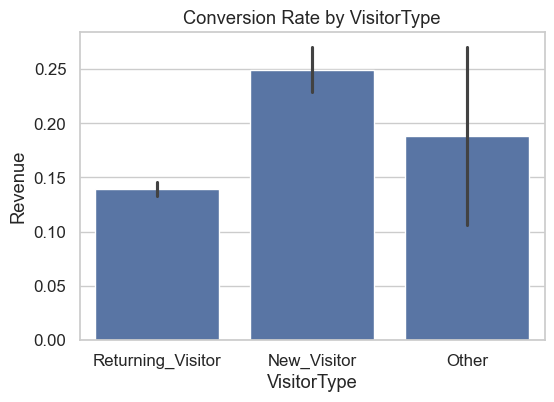

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="VisitorType", data=df)
plt.title("Count by VisitorType")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="VisitorType", y=target_col, data=df)
plt.title("Conversion Rate by VisitorType")
plt.show()


- 신규방문자의 구매율이 더 높음

### 주중 vs 주말 구매율

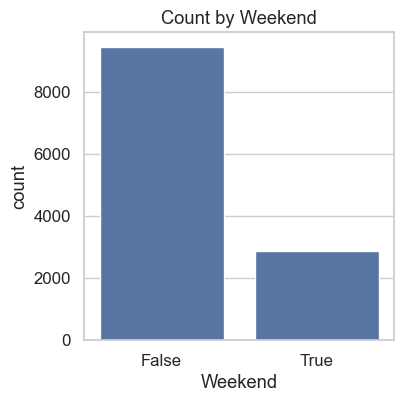

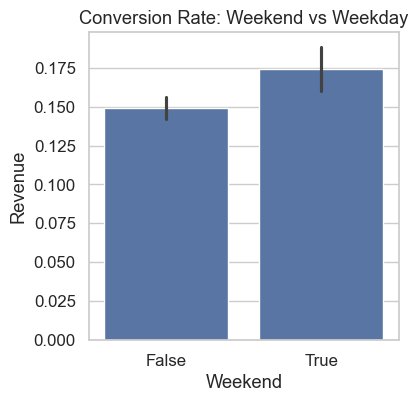

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x="Weekend", data=df)
plt.title("Count by Weekend")
plt.show()

plt.figure(figsize=(4,4))
sns.barplot(x="Weekend", y=target_col, data=df)
plt.title("Conversion Rate: Weekend vs Weekday")
plt.show()


- 주말 고객 방문자가 일평균중에 높음
- 주말 구매 전환률이 높음

### 기타 구매 전환 비교

In [22]:
cat_for_rate = ["Region", "TrafficType", "Browser", "OperatingSystems"]

for col in cat_for_rate:
    conv = df.groupby(col)[target_col].mean().sort_values(ascending=False)
    print(f"\n==== {col} 별 구매율 (상위 10개) ====")
    print(conv.head(10))



==== Region 별 구매율 (상위 10개) ====
Region
9    0.168297
2    0.165493
5    0.163522
1    0.161297
7    0.156373
4    0.148054
3    0.145235
6    0.139130
8    0.129032
Name: Revenue, dtype: float64

==== TrafficType 별 구매율 (상위 10개) ====
TrafficType
16    0.333333
7     0.300000
8     0.276968
20    0.252525
2     0.216458
5     0.215385
10    0.200000
11    0.190283
4     0.154350
14    0.153846
Name: Revenue, dtype: float64

==== Browser 별 구매율 (상위 10개) ====
Browser
12    0.300000
13    0.262295
10    0.196319
5     0.184154
4     0.176630
11    0.166667
8     0.155556
2     0.153624
1     0.148253
7     0.122449
Name: Revenue, dtype: float64

==== OperatingSystems 별 구매율 (상위 10개) ====
OperatingSystems
8    0.215190
4    0.177824
2    0.174973
5    0.166667
1    0.146615
7    0.142857
6    0.105263
3    0.104892
Name: Revenue, dtype: float64


## 수치형 상관관계 Heatmap

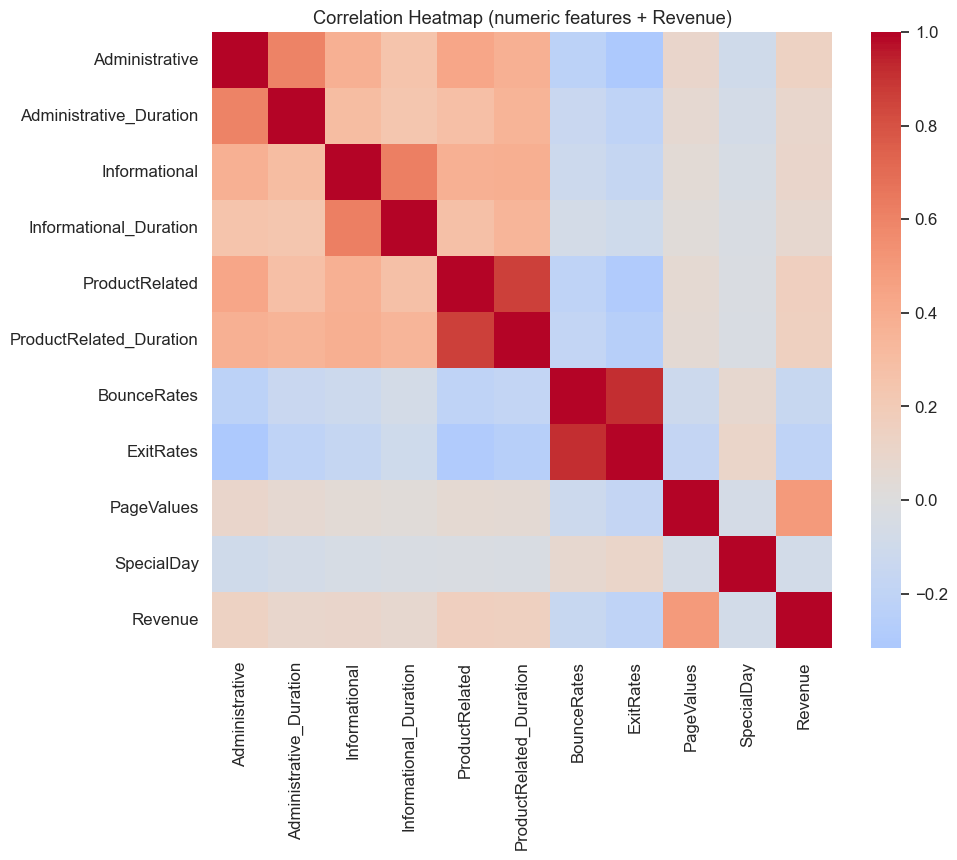


Revenue와의 상관계수:
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [23]:
# 상관분석을 위해 타깃 포함한 데이터프레임 구성
corr_df = df[numeric_features + [target_col]]

corr = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric features + Revenue)")
plt.show()

# Revenue와의 상관만 별도로 정렬해서 보기
print("\nRevenue와의 상관계수:")
print(corr[target_col].sort_values(ascending=False))


# EDA 결론

1. 타깃 불균형 확인 ( Revenue ≈ 15% / 85% )
    - 모델링에서 class_weight or resampling 고려 필요

2. 타입 정리
    - 수치형 10개, 범주형 7개
    - OperatingSystems, Browser, Region, TrafficType는 문자열 카테고리로 변환
    - Revenue, Weekend는 0/1 또는 True/False로 정리
    - Month는 Categorical로 묶어서 월별로 정렬 될 수 있게 수정
    - 결측치 없음

3. 수치형 분포에서 파악한 점
    - PageValues는 구매 세션에서 특히 크게 나타날 것
    - BounceRates, ExitRates가 높으면 이탈 경향↑, 구매↓
    - 페이지 관련 duration 변수들은 heavy-tail → 스케일링, 로그 변환 고려 가능

4. 범주형 vs 타깃
    - Month에 따라 구매율 차이 → 시즌성
    - VisitorType에서 Returning_Visitor의 구매율↑
    - Weekend, TrafficType, Region에 따라도 패턴 존재 → 마케팅/운영 전략과 직결

5. 상관관계 히트맵
    - Revenue와 직접 상관 큰 피처들(특히 PageValues, ExitRates, BounceRates 등)이
    - 모델에서도 중요한 역할을 할 것이라고 “예상” 가능

6. 1월 4월 데이터 누락건
    - 팩트는 "데이터가 없다", 왜 없는지는 추측
    - 데이터 출처부터 없는 데이터에 대한 명시적인 설명을 하지 않았으므로 해당 월의 데이터가 수집/제공되지 않은것으로 간주하고, 10개월 기준의 부분적인 월별 패턴을 다뤄야 함